In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# Exponential distribution

#### Compute the quantiles

In [2]:
def quantile_Y(alpha):
    q_Y = np.zeros((alpha.size))
    for i,alpha_temp in enumerate(alpha):
        if alpha_temp < 0.5:
            q_Y[i] = np.log(2*alpha_temp)
        else:
            q_Y[i] = -np.log(2) - np.log(1-alpha_temp)
    return q_Y

def quantile_Y_given_1(alpha, x1):
    res = x1[:,np.newaxis] - ss.expon.ppf(1 - alpha)[np.newaxis,:]
    return res 

def quantile_Y_given_2(alpha, x2):
    res = ss.expon.ppf(alpha)[np.newaxis,:] - x2[:,np.newaxis]
    return res

#### Compute the truncated expectation

In [3]:
def truncated_expectation(alpha):
    q_Y = quantile_Y(alpha)
    t_EY = np.zeros((alpha.size))
    
    for i,alpha_temp in enumerate(alpha):
        if q_Y[i] < 0:
            t_EY[i] = (np.exp(q_Y[i])*(q_Y[i] - 1))/2
        else:
            t_EY[i] = -(np.exp(-q_Y[i])*(1 + q_Y[i]))/2
    return t_EY
    
def truncated_expectation_Y_given_1(alpha, x1):
    q_X2 = ss.expon.ppf(1 - alpha)[np.newaxis,:]
    t_EY_X1 = alpha[np.newaxis,:]*x1[:,np.newaxis] - np.exp(-q_X2)*(1 + q_X2)
    return t_EY_X1 

def truncated_expectation_Y_given_2(alpha, x2):
    q_X1 = ss.expon.ppf(alpha)[np.newaxis,:]
    t_EY_X2 = 1 - np.exp(-q_X1)*(1 + q_X1) - alpha[np.newaxis,:]*x2[:,np.newaxis]
    return t_EY_X2

#### Compute the QOSA indices

In [4]:
def qosa_indices(alpha):
    qosa_indices = np.zeros((2, alpha.size), dtype=np.float64)
    for i, alpha_temp in enumerate(alpha):
        if alpha_temp >= 0.5:
            qosa_indices[0,i] = ((1-alpha_temp)*(1-np.log(2*(1-alpha_temp)))+
                                alpha_temp*np.log(alpha_temp))/(
                                (1-alpha_temp)*(1-np.log(2*(1-alpha_temp))))
            qosa_indices[1,i] = ((1-alpha_temp)*(1-np.log(2*(1-alpha_temp)))+
                                (1-alpha_temp)*np.log(1-alpha_temp))/(
                                (1-alpha_temp)*(1-np.log(2*(1-alpha_temp))))
        else:
            qosa_indices[0,i] = (alpha_temp*(1-np.log(2*alpha_temp))+
                                alpha_temp*np.log(alpha_temp))/(
                                alpha_temp*(1-np.log(2*alpha_temp)))
            qosa_indices[1,i] = (alpha_temp*(1-np.log(2*alpha_temp))+
                                (1-alpha_temp)*np.log(1-alpha_temp))/(
                                alpha_temp*(1-np.log(2*alpha_temp)))
    return qosa_indices

In [5]:
alpha = np.array([0.1, 0.3, 0.7, 0.9])
q_Y = quantile_Y(alpha)
t_EY = truncated_expectation(alpha)
QOSA_indices = qosa_indices(alpha)

## Test on the two variables

In [6]:
n_sample = 10**7
X1_values = ss.expon.rvs(size=n_sample, random_state=None)
q_Y_X1 = quantile_Y_given_1(alpha, X1_values)
t_EY_X1 = truncated_expectation_Y_given_1(alpha, X1_values)

In [7]:
n_sample = 10**7
X2_values = ss.expon.rvs(size=n_sample, random_state=None)
q_Y_X2 = quantile_Y_given_2(alpha, X2_values)
t_EY_X2 = truncated_expectation_Y_given_2(alpha, X2_values)

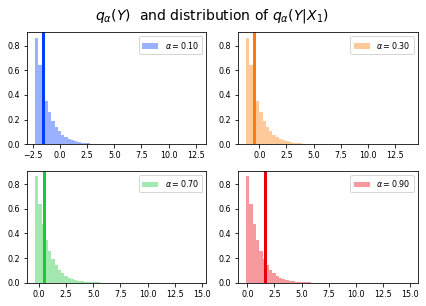

In [8]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X1[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

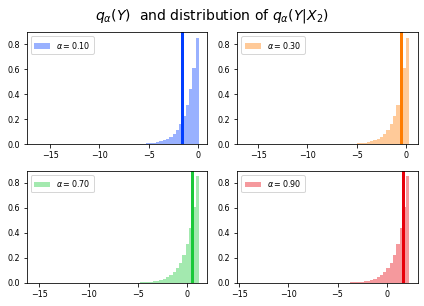

In [9]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X2[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

In [10]:
q_Y

array([-1.60943791, -0.51082562,  0.51082562,  1.60943791])

In [11]:
(q_Y - q_Y_X1.mean(axis=0))/q_Y

array([ 0.19071759,  0.6008863 , -0.25956946,  0.44407002])

In [12]:
(q_Y - q_Y_X2.mean(axis=0))/q_Y

array([ 0.44393625, -0.25999092,  0.60130776,  0.19085136])

In [13]:
QOSA_indices

array([[0.11759345, 0.20310274, 0.44914785, 0.63660962],
       [0.63660962, 0.44914785, 0.20310274, 0.11759345]])

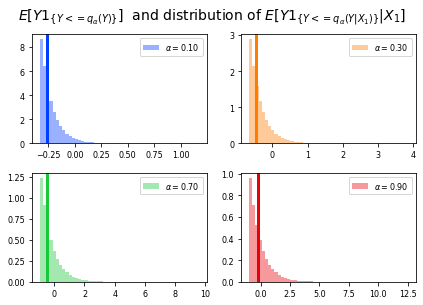

In [14]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X1[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

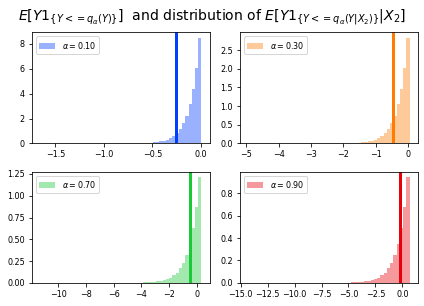

In [15]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X2[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [16]:
t_EY

array([-0.26094379, -0.45324769, -0.45324769, -0.26094379])

In [17]:
(t_EY - t_EY_X1.mean(axis=0))/t_EY

array([0.11762998, 0.20316581, 0.44929504, 0.63693831])

In [18]:
(t_EY - t_EY_X2.mean(axis=0))/t_EY

array([0.63649059, 0.44894228, 0.20262306, 0.11652223])

In [19]:
QOSA_indices

array([[0.11759345, 0.20310274, 0.44914785, 0.63660962],
       [0.63660962, 0.44914785, 0.20310274, 0.11759345]])

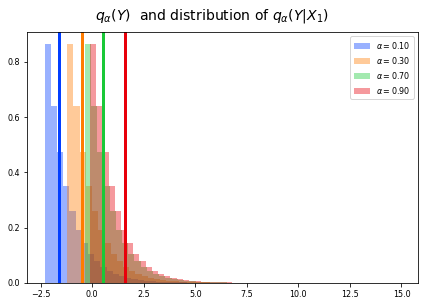

In [20]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X1[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

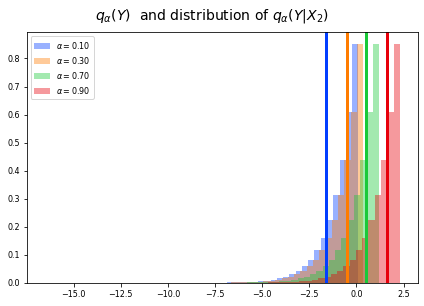

In [21]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X2[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

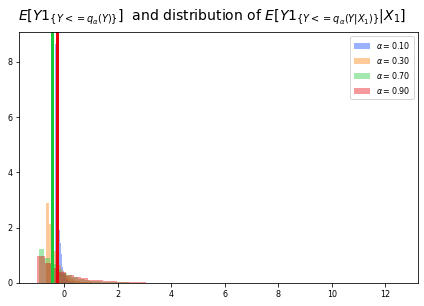

In [22]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X1[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

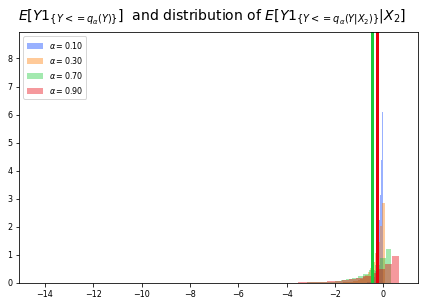

In [23]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X2[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [24]:
x1_values = np.arange(0,10)
q_Y_x1 = quantile_Y_given_1(alpha, x1_values)
t_EY_x1 = truncated_expectation_Y_given_1(alpha, x1_values)

In [25]:
x2_values = np.arange(0,10)
q_Y_x2 = quantile_Y_given_2(alpha, x2_values)
t_EY_x2 = truncated_expectation_Y_given_2(alpha, x2_values)

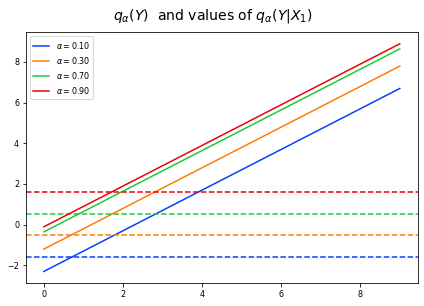

In [26]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x1_values, q_Y_x1[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=q_Y[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and values of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

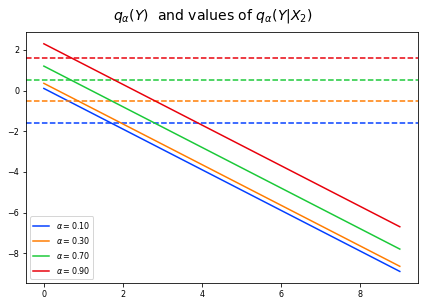

In [27]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x2_values, q_Y_x2[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=q_Y[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and values of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

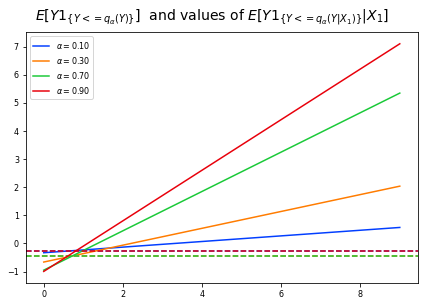

In [28]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x1_values, t_EY_x1[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=t_EY[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and values of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

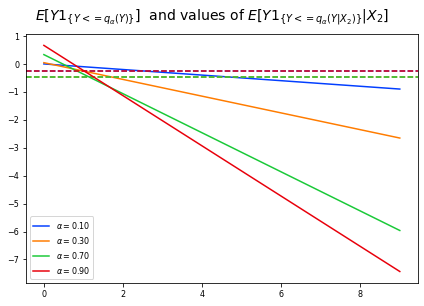

In [29]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x2_values, t_EY_x2[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=t_EY[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and values of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [30]:
ss.expon.ppf(alpha)

array([0.10536052, 0.35667494, 1.2039728 , 2.30258509])